In [95]:
# gerekli kütüphaneleri import ediyoruz

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,mean_absolute_error, accuracy_score
from sklearn.metrics import precision_score

In [2]:
# veriyi okuyoruz
data=pd.read_csv("C:\\Users\\Merve\\Desktop\\creditcard.csv")
data.head()
# diğer özellikleri gizlilik nedeniyle göremiyoruz 
#ancak bunlar ölçeklenmiş durumda

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# eksik veri var mı diye kontrol ediyoruz
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

eksik veri yok

C:\Users\Merve\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '(1) Dolandırıcı - (0) Dolandırıcı Değil ')

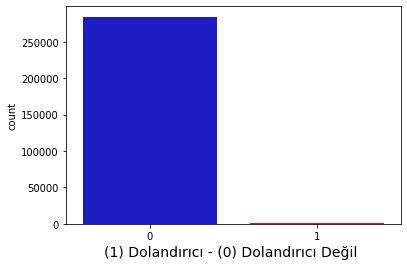

In [5]:
# veri setini dağılımına bakıyoruz
colors = ["#0101DF", "#DF0101"]
plt.ylabel("Dolandırıcılık Tespiti")
sns.countplot('Class', data=data, palette=colors)
plt.xlabel("(1) Dolandırıcı - (0) Dolandırıcı Değil ", fontsize=14)

In [6]:
dolandırıcılık = data['Class'].value_counts()

print(dolandırıcılık)
print('Veri setinin %', round(data['Class'].value_counts()[0]/len(data) * 100,2),"ü dolandırıcı değil.")
print('Veri setinin %', round(data['Class'].value_counts()[1]/len(data) * 100,2), 'si dolandırıcı.')

0    284315
1       492
Name: Class, dtype: int64
Veri setinin % 99.83 ü dolandırıcı değil.
Veri setinin % 0.17 si dolandırıcı.


In [10]:
# data["Class"].value_counts()[0]/len(data)

In [11]:
# veri setindeki ölçeklendirilmemiş olan özellikleri ölçeklendiriyorum

scaler=StandardScaler()
data["scaled_amount"]=scaler.fit_transform(data["Amount"].values.reshape(-1,1))
data["scaled_time"]=scaler.fit_transform(data["Time"].values.reshape(-1,1))
data.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


 veri seti dengesiz yani dolancırıcı olan örnekler az olduğu için modelimiz dolandırıcılıkları tespit edemeyebilir.Bu yüzden veri seti için alt örnekleme yapacağız. yeni azınlık sınıfı örneği oluşturacağız

In [13]:
# bağımlı ve bağımsız değişenkler

y=data.Class # bağımlı değişeken
x=data.drop(["Class"],axis=1) # bağımsız değişkenler

In [14]:
# !pip install imblearn 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(x, y)

In [15]:
X_resampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,2.049094,0.186189,-1.707198,0.530768,0.160589,-1.448570,0.239310,-0.353611,0.634425,-0.471390,...,0.197782,0.741141,-0.009744,-0.085057,0.228384,-0.097292,-0.001028,-0.032390,-0.341275,1.418654
1,2.125540,-0.030714,-1.527653,0.121046,0.543172,-0.347988,0.157221,-0.229126,0.477999,0.046959,...,-0.336497,-0.838932,0.275173,0.049145,-0.156765,0.205919,-0.072321,-0.059009,-0.345313,0.550731
2,-4.155859,-5.705748,0.274699,-0.993262,-6.059393,5.210848,5.811316,0.367888,1.750710,-4.171672,...,1.371671,1.195815,4.188762,-1.091077,1.033044,0.224493,-0.486741,0.194275,7.393702,-1.438885
3,-0.566420,-0.579576,0.823503,-1.451240,-0.583587,0.206381,1.601392,-0.370446,-1.910354,0.252497,...,-0.065082,-0.761357,0.641524,-0.568974,-0.053164,-0.690995,-0.228630,-0.157254,0.926358,-0.612003
4,0.060858,-0.261762,-1.699493,-1.202327,3.699527,3.196249,0.437208,0.421541,0.492435,-0.455964,...,0.008303,0.534602,0.089602,0.667918,0.017798,0.611584,-0.469946,-0.514370,-0.307251,0.888879


In [16]:

y_resampled = pd.DataFrame(data=y_resampled)
y_resampled.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [17]:
normal_distributed_df = pd.concat([X_resampled, y_resampled])

In [18]:
normal_distributed_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,2.049094,0.186189,-1.707198,0.530768,0.160589,-1.448570,0.239310,-0.353611,0.634425,-0.471390,...,0.741141,-0.009744,-0.085057,0.228384,-0.097292,-0.001028,-0.032390,-0.341275,1.418654,NaN
1,2.125540,-0.030714,-1.527653,0.121046,0.543172,-0.347988,0.157221,-0.229126,0.477999,0.046959,...,-0.838932,0.275173,0.049145,-0.156765,0.205919,-0.072321,-0.059009,-0.345313,0.550731,NaN
2,-4.155859,-5.705748,0.274699,-0.993262,-6.059393,5.210848,5.811316,0.367888,1.750710,-4.171672,...,1.195815,4.188762,-1.091077,1.033044,0.224493,-0.486741,0.194275,7.393702,-1.438885,NaN
3,-0.566420,-0.579576,0.823503,-1.451240,-0.583587,0.206381,1.601392,-0.370446,-1.910354,0.252497,...,-0.761357,0.641524,-0.568974,-0.053164,-0.690995,-0.228630,-0.157254,0.926358,-0.612003,NaN
4,0.060858,-0.261762,-1.699493,-1.202327,3.699527,3.196249,0.437208,0.421541,0.492435,-0.455964,...,0.534602,0.089602,0.667918,0.017798,0.611584,-0.469946,-0.514370,-0.307251,0.888879,NaN


In [25]:
normal_distributed_df.count()

V1               984
V2               984
V3               984
V4               984
V5               984
V6               984
V7               984
V8               984
V9               984
V10              984
V11              984
V12              984
V13              984
V14              984
V15              984
V16              984
V17              984
V18              984
V19              984
V20              984
V21              984
V22              984
V23              984
V24              984
V25              984
V26              984
V27              984
V28              984
scaled_amount    984
scaled_time      984
Class            984
dtype: int64

Distribution of the Classes in the subsample dataset


C:\Users\Merve\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


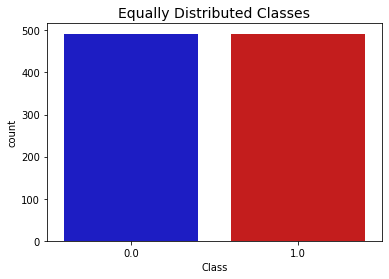

In [20]:
print('Distribution of the Classes in the subsample dataset')

sns.countplot('Class', data=normal_distributed_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

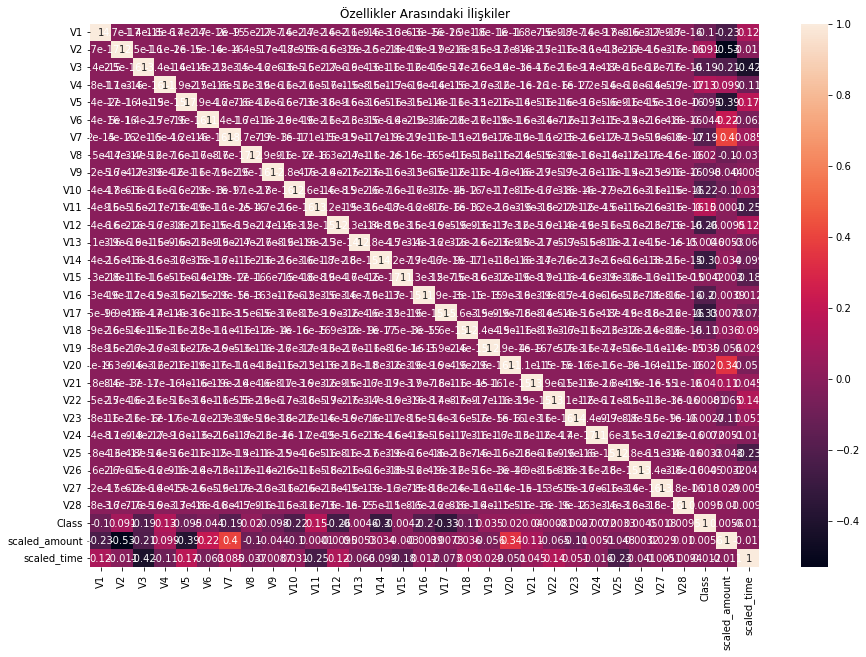

In [21]:
corr_matrisi=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrisi,annot=True)
plt.title("Özellikler Arasındaki İlişkiler")
plt.show()

In [ ]:
# modelin doğruluğunu arttırmak için aykırı değerleri çıkarıyoruz

In [22]:
Q1=normal_distributed_df.quantile(0.25) #1. çeyrek
Q3=normal_distributed_df.quantile(0.75) #3. çeyrek
IQR=Q3-Q1
alt_sınır=Q1 - 1.5 * IQR
ust_sınır=Q3 + 1.5 * IQR


In [24]:
clean_data = normal_distributed_df[~((normal_distributed_df < alt_sınır) |(normal_distributed_df > ust_sınır)).any(axis=1)]
#alt sınırdan küçük ve üst sınırdan büyük olanlar DIŞINDAKİLERİ aldık
#yani aykırı değerleri silmiş olduk
clean_data.shape 

(759, 31)

In [27]:
# veri setini eğitim ve test olarak ayırıyorum
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 0)
  

## Model Kurma

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

## LogisticRegression

In [29]:
classifer=LogisticRegression()
classifer.fit(X_test,y_test)

C:\Users\Merve\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [84]:
LogisticRegression_pred=classifer.predict(X_test)


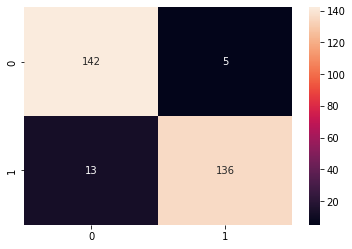

In [85]:
karmaşıklık_matrisi=confusion_matrix(y_test,LogisticRegression_pred)
plt.figure()
sns.heatmap(karmaşıklık_matrisi,annot=True,fmt=".0f")
plt.show()

In [86]:
dogruluk=accuracy_score(y_test,LogisticRegression_pred)
dogruluk


0.9391891891891891

In [87]:
# dengesiz bir veri seti olduğu için doğruluk değeri yanlıltıcı olabilir
recall=recall_score(y_test,LogisticRegression_pred)
recall

0.912751677852349

In [102]:
precision_score(y_test, LogisticRegression_pred)

0.9645390070921985

##  Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
classifier=RandomForestClassifier()# model nesnesini oluşturduk
classifier.fit(X_train,y_train)#modeli eğittik

C:\Users\Merve\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [63]:
RandomForest_pred=classifier.predict(X_test) 

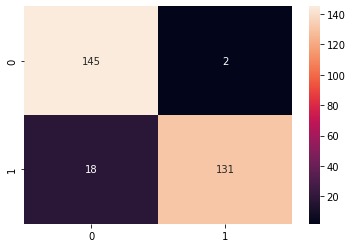

In [64]:
#modelin karmaşıklık matrisini oluşturalım
karmaşıklık_matrisi=confusion_matrix(y_test,RandomForest_pred)
plt.figure()
sns.heatmap(karmaşıklık_matrisi,annot=True,fmt=".0f")
plt.show()

In [65]:
dogruluk=accuracy_score(y_test,RandomForest_pred)
dogruluk


0.9324324324324325

In [66]:
recall=recall_score(y_test,RandomForest_pred)
recall



0.8791946308724832

In [101]:
precision_score(y_test, RandomForest_pred)

0.9849624060150376

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
#model
knn=KNeighborsClassifier(n_neighbors=2)
# eğitim
knn.fit(X_train,y_train)

C:\Users\Merve\AppData\Roaming\Python\Python36\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [69]:
# tahmin
knn_pred=knn.predict(X_test)

Karışıklık Matrisi [[144   3]
 [ 21 128]]


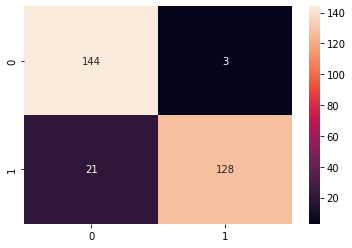

In [70]:
# karışıklık matrisi
cm=confusion_matrix(y_test,knn_pred)
print("Karışıklık Matrisi",cm)
plt.figure()
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [71]:
dogruluk=accuracy_score(y_test,knn_pred)
dogruluk

0.918918918918919

In [72]:
recall=recall_score(y_test,knn_pred)
recall



0.8590604026845637

In [100]:
precision_score(y_test, knn_pred)

0.9770992366412213

## SVC

In [73]:
from sklearn.svm import SVC  
classifer=SVC(kernel="linear")# model nesnesi oluşturduk
classifer.fit(X_train,y_train)# modeli eğittik


C:\Users\Merve\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [74]:
#tahmin
svc_pred=knn.predict(X_test)

Karışıklık Matrisi [[144   3]
 [ 21 128]]


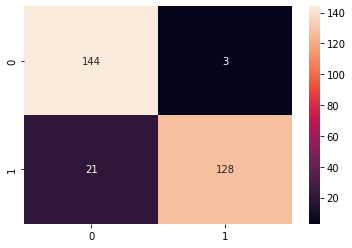

In [75]:
# karışıklık matrisi
cm=confusion_matrix(y_test,svc_pred)
print("Karışıklık Matrisi",cm)
plt.figure()
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [76]:
dogruluk=accuracy_score(y_test,svc_pred)
dogruluk


0.918918918918919

In [77]:
recall=recall_score(y_test,svc_pred)
recall

0.8590604026845637

In [99]:
precision_score(y_test, svc_pred)

0.9770992366412213

## DecisionTreeClassifier

In [78]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=6)# model nesnesi oluşturduk
classifier.fit(X_train,y_train)#modeli eğittik

DecisionTreeClassifier(max_depth=6)

In [79]:
DecisionTree_pred=classifier.predict(X_test)

Karışıklık Matrisi [[136  11]
 [ 15 134]]


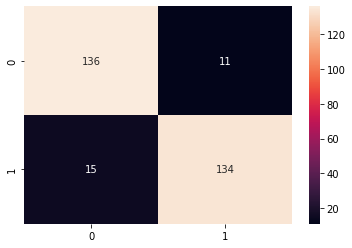

In [80]:
# karışıklık matrisi
cm=confusion_matrix(y_test,DecisionTree_pred)
print("Karışıklık Matrisi",cm)
plt.figure()
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [81]:
dogruluk=accuracy_score(y_test,DecisionTree_pred)
dogruluk

0.9121621621621622

In [82]:
recall=recall_score(y_test,DecisionTree_pred)
recall

0.8993288590604027

In [98]:
precision_score(y_test, DecisionTree_pred)

0.9241379310344827